Connection success.
   release_date  sum_worldwide_boxoffice
0      December             2.102436e+10
1      November             1.954717e+10
2           May             1.678760e+10
3          June             1.669948e+10
4          July             1.651146e+10
5         March             1.365344e+10
6        August             1.156775e+10
7       October             1.087826e+10
8         April             1.007291e+10
9     September             9.976741e+09
10     February             9.947670e+09
11      January             6.270436e+09


C:\Users\leath\AppData\Local\Temp\ipykernel_12460\2936846417.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfRel = pd.read_sql("""SELECT release_date, SUM(worldwide_boxoffice) AS sum_worldwide_boxoffice


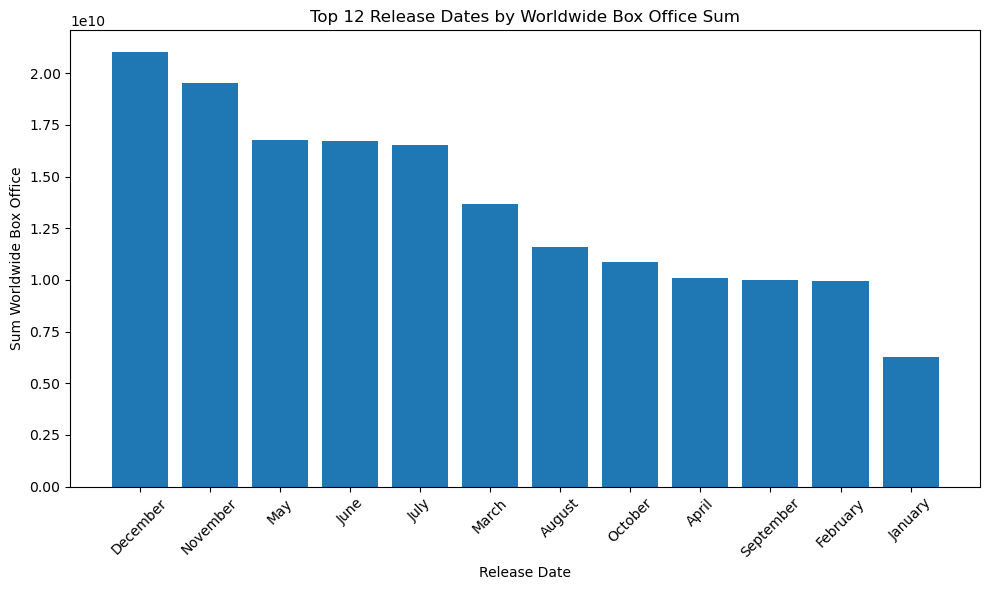

Connection closed.


In [12]:
# Define a function to connect to database

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Function to connect to the PostgreSQL database
def connectDB():
    conn = psycopg2.connect(
        dbname="Movie Industry Database",
        user="postgres",
        password="Quickborn123",
        host="localhost",
        port="5432")
    return conn

# Function to retrieve data from the database
def getsuccrel(conn):
    dfRel = pd.read_sql("""SELECT release_date, SUM(worldwide_boxoffice) AS sum_worldwide_boxoffice
                            FROM movies
                            GROUP BY release_date
                            ORDER BY sum_worldwide_boxoffice DESC LIMIT (12)""", conn)
    return dfRel

# Establish a database connection
conn = connectDB()
print("Connection success.")

# Retrieve data from the database
dfRel = getsuccrel(conn)
print(dfRel)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(dfRel['release_date'], dfRel['sum_worldwide_boxoffice'])
plt.xlabel('Release Date')
plt.ylabel('Sum Worldwide Box Office')
plt.title('Top 12 Release Dates by Worldwide Box Office Sum')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
conn.close()
print("Connection closed.")




In [11]:
# Print the column names in your DataFrame
print(dfRel.columns)

Index(['release_date', 'sum_worldwide_boxoffice'], dtype='object')
